In [73]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how='outer', on='city')

# Display the data table for preview
combined_data.head()



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [74]:
#Urban cities grouped
urban_cities = combined_data[combined_data['type'] == 'Urban']
urban_cities.head()

#Rural cities grouped
rural_cities = combined_data[combined_data['type'] == 'Rural']
rural_cities.head()

#Suburban cities grouped
suburban_cities = combined_data[combined_data['type'] == 'Suburban']
suburban_cities.head()

#Urban cities info
u_ride_count = urban_cities.groupby(['city']).count()['ride_id']
u_ride_count.head()
u_fare_avg = urban_cities.groupby(['city']).mean()['fare']
u_fare_avg.head()
u_driver_count = urban_cities.groupby(['city']).mean()['driver_count']
u_driver_count.head()

#Rural cities info
r_ride_count = rural_cities.groupby(['city']).count()['ride_id']
r_ride_count.head()
r_fare_avg = rural_cities.groupby(['city']).mean()['fare']
r_fare_avg.head()
r_driver_count =rural_cities.groupby(['city']).mean()['driver_count']
r_driver_count.head()

#Suburban cities info
s_ride_count = suburban_cities.groupby(['city']).count()['ride_id']
s_ride_count.head()
s_fare_avg = suburban_cities.groupby(['city']).mean()['fare']
s_fare_avg.head()
s_driver_count = suburban_cities.groupby(['city']).count()['driver_count']
s_driver_count.head()



city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: driver_count, dtype: int64

## Bubble Plot of Ride Sharing Data

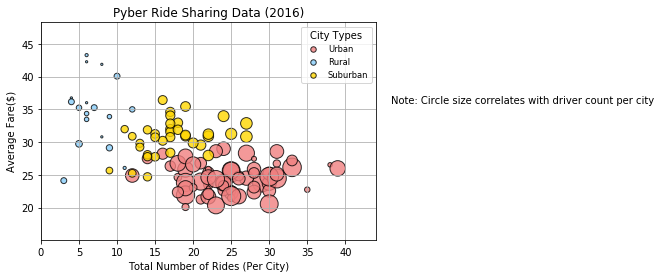

In [75]:
# Build the scatter plots for each city types
plt.scatter(u_ride_count,
           u_fare_avg,
           s=u_driver_count*5, c="lightcoral", marker="o", alpha=.8, 
            linewidths=1, edgecolors="black", label = "Urban")

plt.scatter(r_ride_count,
           r_fare_avg,
           s=r_driver_count*5, c="lightskyblue", marker="o", alpha=.8, 
            linewidths=1, edgecolors="black", label = "Rural")

plt.scatter(s_ride_count,
           s_fare_avg,
           s=s_driver_count*5, c="gold", marker="o", alpha=.8, 
            linewidths=1, edgecolors="black", label = "Suburban")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,max(u_ride_count)+5))
plt.ylim((min(u_fare_avg)-5,max(r_fare_avg)+5))
plt.grid(True)

# Create a legend

lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints = 1, scatterpoints = 1, 
                 loc = "best", title = "City Types", labelspacing = .5)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(max(u_ride_count)+7, max(u_fare_avg)+7, "Note: Circle size correlates with driver count per city")

# Save Figure
plt.savefig('PyberCityTypeSctr.png')

# Show plot
plt.show()

In [76]:
# Calculate Type Percents
city_type_percents = combined_data.groupby(["type"]).sum()["fare"]/combined_data["fare"].sum()
city_type_percents

type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64

## Total Fares by City Type

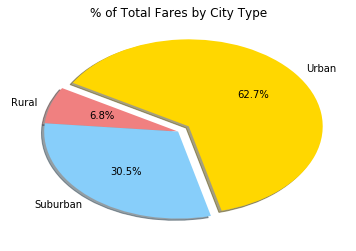

In [77]:

#pie chart lists
types = ["Rural","Suburban", "Urban"]
colors = ["lightcoral","lightskyblue","gold"]
explode = [0,0,.1]

# Build Pie Chart
plt.pie(city_type_percents,
        explode=explode, labels= types, colors=colors,
        autopct='%1.1f%%', pctdistance=0.6, shadow=True, 
        labeldistance=1.1, startangle=150)

plt.title("% of Total Fares by City Type")

#SaveFigure
plt.savefig("TotFaresByCityTypePieChart.png")

plt.show()

In [78]:
# Calculate Type Percents
city_type_total_rides = combined_data.groupby(["type"]).count()["ride_id"]/combined_data["ride_id"].count()
city_type_total_rides

type
Rural       0.052632
Suburban    0.263158
Urban       0.684211
Name: ride_id, dtype: float64

## Total Rides by City Type

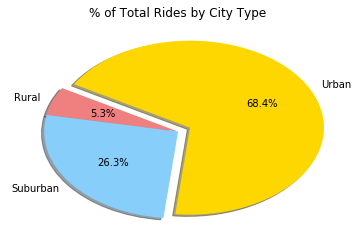

In [79]:
#pie chart lists
types = ["Rural","Suburban", "Urban"]
colors = ["lightcoral","lightskyblue","gold"]
explode = [0,0,.1]

# Build Pie Chart
plt.pie(city_type_total_rides,
        explode=explode, labels= types, colors=colors,
        autopct='%1.1f%%', pctdistance=0.6, shadow=True, 
        labeldistance=1.1, startangle=150)

plt.title("% of Total Rides by City Type")

#SaveFigure
plt.savefig("TotRidesByCityTypePieChart.png")

plt.show()

In [80]:
# Calculate Type Percents
city_type_total_drivers = combined_data.groupby(["type"]).sum()["driver_count"]/combined_data["driver_count"].sum()
city_type_total_drivers

type
Rural       0.007816
Suburban    0.124729
Urban       0.867456
Name: driver_count, dtype: float64

## Total Drivers by City Type

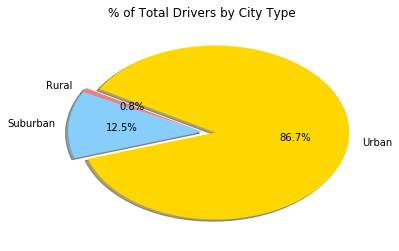

In [81]:
#pie chart lists
types = ["Rural","Suburban", "Urban"]
colors = ["lightcoral","lightskyblue","gold"]
explode = [0,0,.1]

# Build Pie Chart
plt.pie(city_type_total_drivers,
        explode=explode, labels= types, colors=colors,
        autopct='%1.1f%%', pctdistance=0.6, shadow=True, 
        labeldistance=1.1, startangle=150)

plt.title("% of Total Drivers by City Type")

#SaveFigure
plt.savefig("TotDriversByCityTypePieChart.png")

plt.show()
